<font size =6>
Проверка нормальности распределения

Выполнил: Шутов Захар (ММБ-003)

#Введение

Цель работы — проверить гипотезу о нормальности распределения исследуемого
признака генеральной совокупности.

Подключаем библиотеки

In [1]:
install.packages("dplyr")
library(dplyr)
install.packages("readxl")
library(readxl)
install.packages("xlsx")
install.packages("sm")
library(sm)
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’


Warning message in install.packages("xlsx"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsxjars’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsx’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Installing package into ‘/us

In [2]:
ds0 <- read_xlsx("AD.ds3.xlsx")
head(ds0)

v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,⋯,v72,v73,v74,v75,v76,v77,v78,v79,v80,G
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.059313,-1.8555210,-17.162673,11.044343,-23.3417797,-42.52024,53.133029,17.829904,15.31252,46.026926,⋯,18.143563,-14.173505,-12.9088142,-30.324509,11.314424,35.557165,18.456091,7.427282,-30.38895,1
11.853664,-1.2877461,-26.281267,-21.672478,0.9784497,-19.72256,-45.017433,19.227115,34.18348,65.385567,⋯,1.447923,-4.507531,-5.5788553,3.159857,30.422340,34.115070,18.175637,7.389731,-29.03563,3
7.770431,-6.6498313,-18.138106,-9.144086,-6.8826825,-50.59306,-7.432258,18.870878,32.18399,-15.468149,⋯,17.018063,-6.249020,-21.0934707,-11.894213,30.611333,-9.326853,11.518727,39.650201,-28.20107,3
9.634201,18.2956757,-1.251677,-5.454505,-10.4190252,-15.41952,3.636486,14.139482,19.37617,-1.363523,⋯,5.788373,13.385526,-0.8834297,-28.111708,7.078885,24.275838,23.820348,-2.653444,-26.81064,1
9.693239,-2.4210789,-10.350603,-9.555780,14.6070573,13.65810,-8.667340,20.476363,27.17903,42.885804,⋯,4.913177,-16.022962,-20.8642553,-17.932962,20.897679,-5.641990,7.759069,-1.067956,-24.84395,1
11.548443,-0.9830199,-9.820367,-15.575293,-25.9817017,-20.20311,-26.725880,-5.831976,23.88654,32.776407,⋯,1.714757,-1.128292,-24.2746103,-14.356669,20.561985,35.140389,22.342715,15.389578,-22.85434,3


С помощью функции factor сделаем тип столбец Factor факторной переменной

In [3]:
ds <- dplyr::select(ds0, Factor = G, s15 = v15, )
ds

Factor,s15
<dbl>,<dbl>
1,-12.5906581
3,3.1598574
3,-11.8942125
1,-19.7507802
1,30.4586138
3,-14.3566695
1,-8.0033942
2,13.5829396
3,-9.2491518


Используя функцию subset пакета dplyr, создадим переменные sample1, sample2, sample3, sample4, содержащие независимые выборки

In [4]:
Factor <- c(1, 2, 3, 4)
sample1 <- subset(ds, Factor == 1)
sample1

Factor,s15
<dbl>,<dbl>
1,-12.5906581
1,-19.7507802
1,30.4586138
1,-8.0033942
1,-10.2166041
1,18.5433237
1,-6.2592107
1,17.8931600
1,-12.0520042


In [5]:
sample2 <- subset(ds, Factor == 2)
sample2

Factor,s15
<dbl>,<dbl>
2,13.58293957
2,-17.51325271
2,21.41191544
2,9.22556751
2,7.34804644
2,-1.82034228
2,9.19231411
2,-0.01778631
2,3.43611646


In [6]:
sample3 <- subset(ds, Factor == 3)
sample3

Factor,s15
<dbl>,<dbl>
3,3.159857
3,-11.894213
3,-14.356669
3,-9.249152
3,26.179259
3,13.311967
3,3.970848
3,1.514377
3,-15.852186


In [7]:
sample4 <- subset(ds, Factor == 4)
sample4

Factor,s15
<dbl>,<dbl>
4,7.143925
4,18.670766
4,8.799249
4,11.608173
4,11.451613
4,6.467330
4,3.144780
4,-3.731040
4,15.249336


Выборка равна генеральной совокупности с соответствующим номером

#Визуализация данных

## Первая выборка

Квантильный график

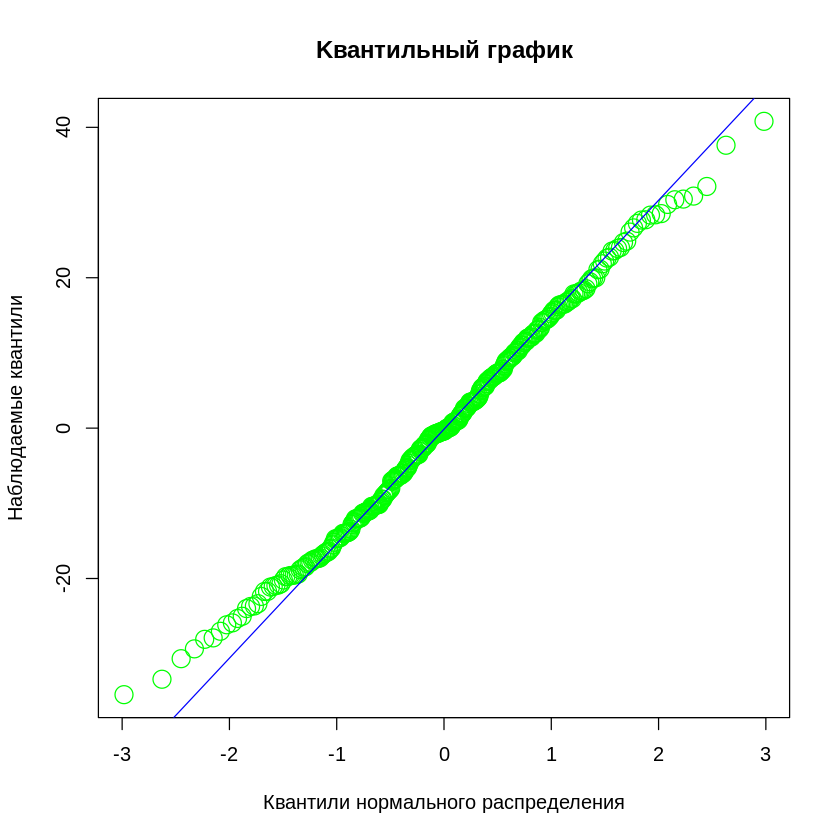

In [8]:
qqnorm(sample1$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample1$s15, col = "blue")

Большинство точек графика распределены вдоль биссектрисы, есть некоторые квантили эмпирического распределения, которые не сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения плотности нормального распределения выборки

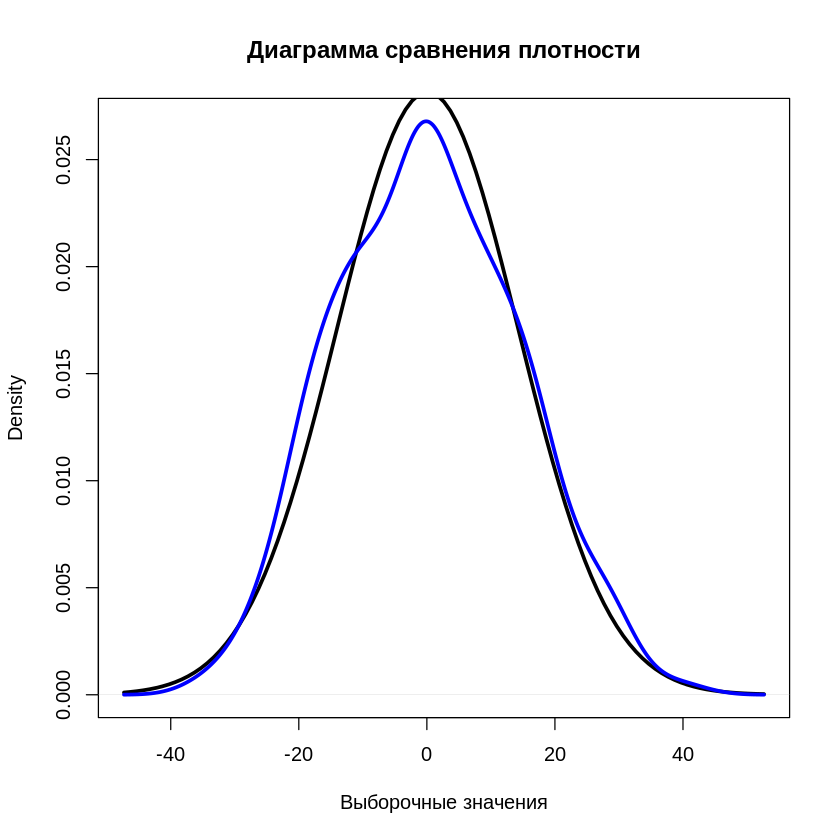

In [49]:
m1 <- mean(sample1$s15)
s1 <- sd(sample1$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample1$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample1$s15),col = "blue", lwd = 3)

График эмпирической плотности, близок к графику плотности нормального распределения и имеет не большие отклонения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

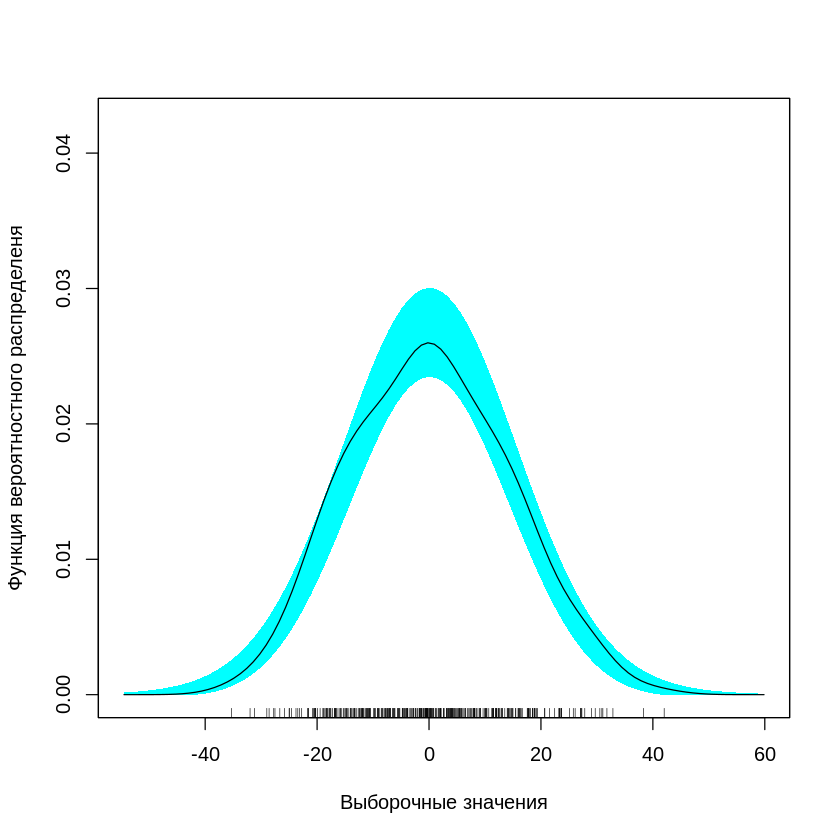

In [53]:
sm.density(sample1$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен в пределах полосы, определяемой нормальным распределением, т.е. график эмпирической плотности схож с графиком плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может подходить для описания исследуемого показателя

## Вторая выборка

Квантильный график

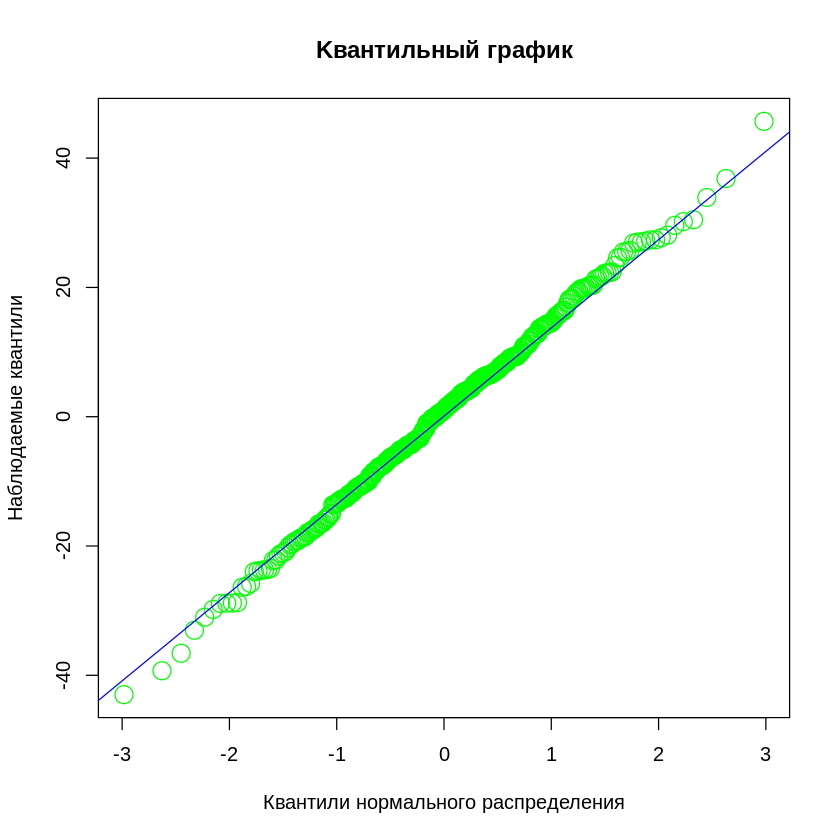

In [11]:
qqnorm(sample2$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample2$s15, col = "blue")

Большинство точек графика распределены вдоль биссектрисы, есть некоторые квантили эмпирического распределения, которые не сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения плотности нормального распределения выборки

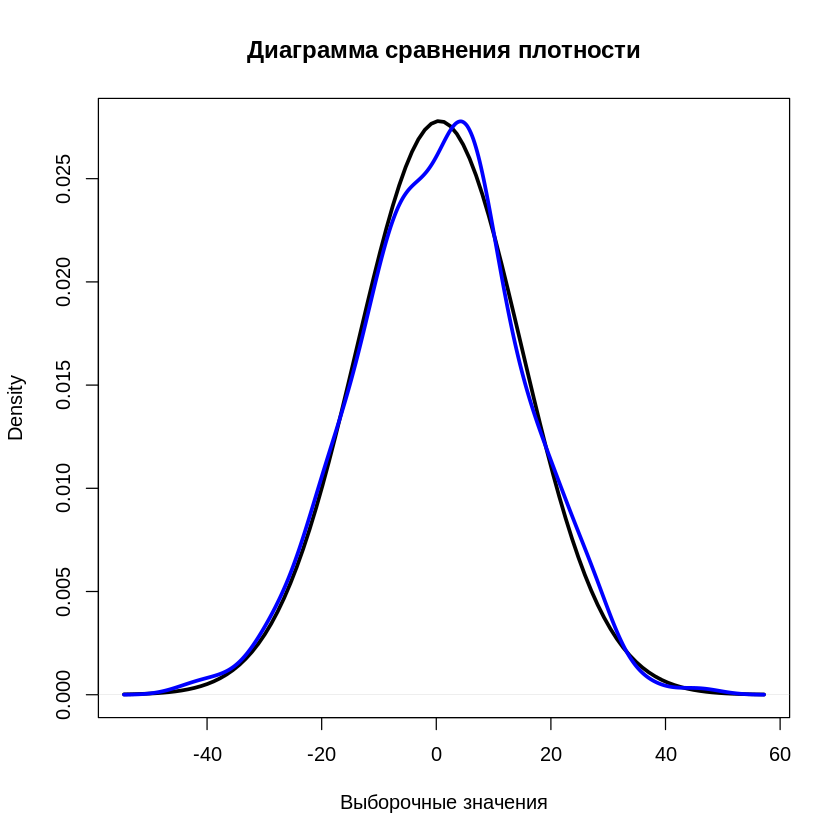

In [50]:
m1 <- mean(sample2$s15)
s1 <- sd(sample2$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample2$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample2$s15),col = "blue", lwd = 3)

График эмпирической плотности, близок к графику плотности нормального распределения и имеет не большие отклонения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

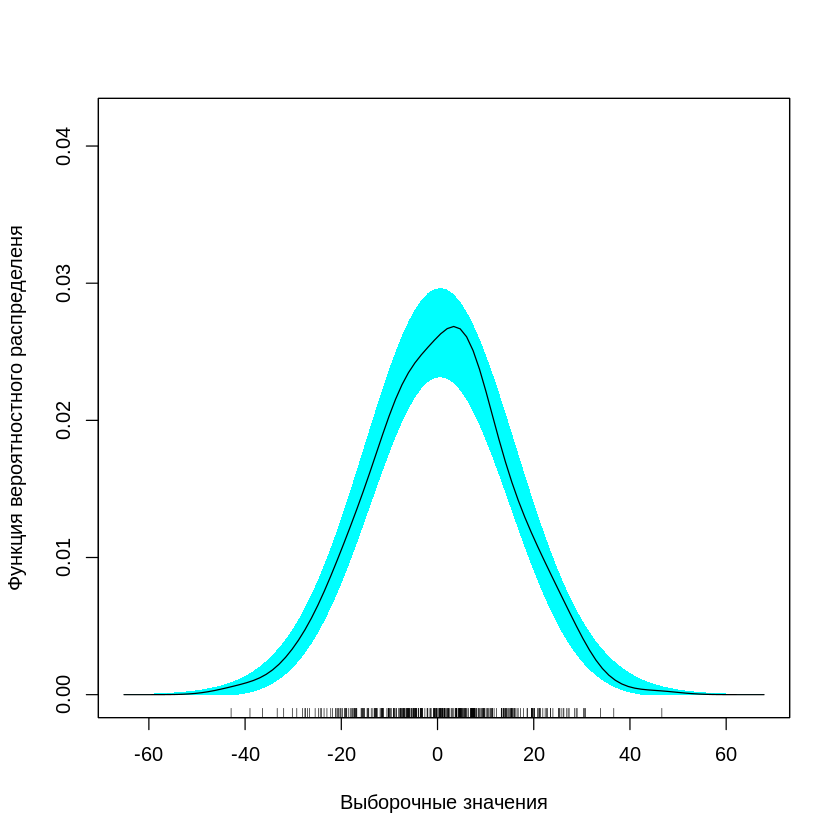

In [54]:
sm.density(sample2$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен в пределах полосы, определяемой нормальным распределением, т.е. график эмпирической плотности схож с графиком плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может подходить для описания исследуемого показателя

## Третья выборка

Квантильный график

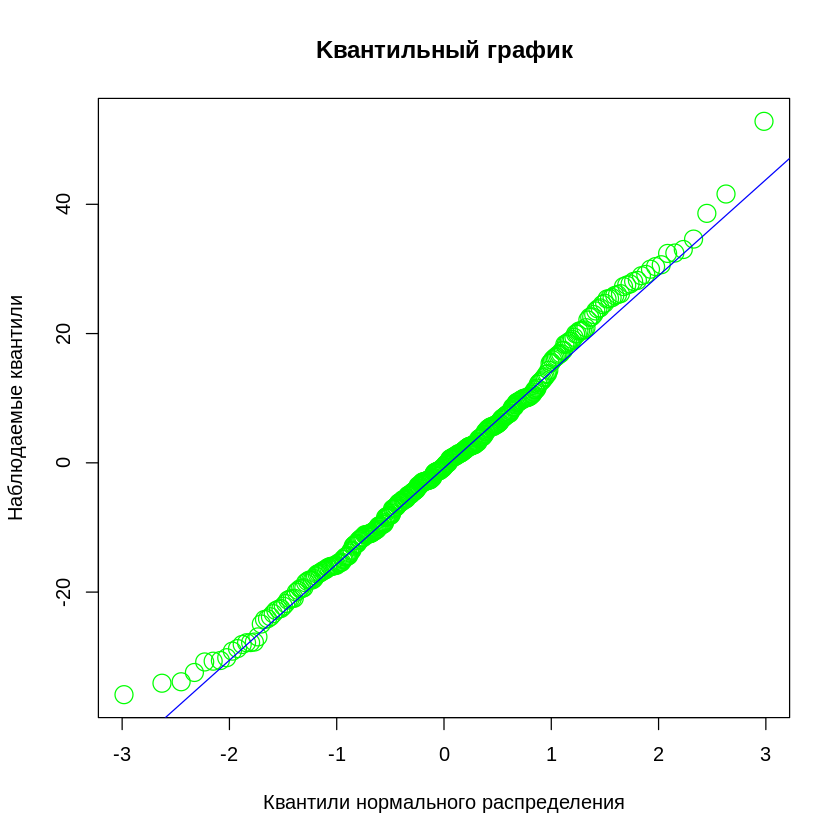

In [14]:
qqnorm(sample3$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample3$s15, col = "blue")

Большинство точек графика распределены вдоль биссектрисы, есть некоторые квантили эмпирического распределения, которые не сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения плотности нормального распределения выборки

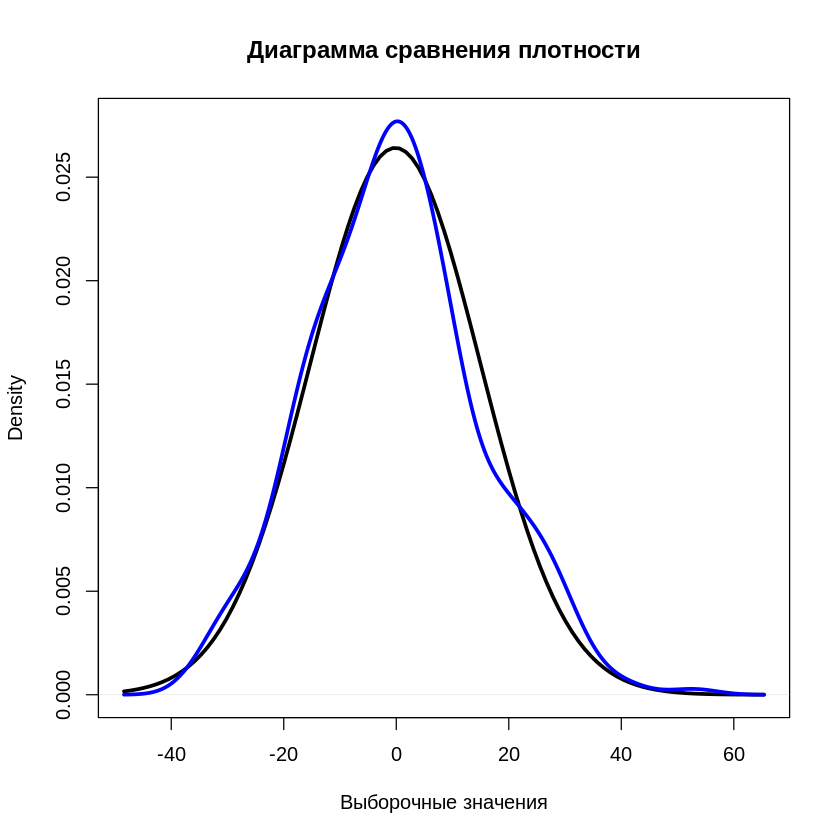

In [51]:
m1 <- mean(sample3$s15)
s1 <- sd(sample3$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample3$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample3$s15),col = "blue", lwd = 3)

График эмпирической плотности, близок к графику плотности нормального распределения и имеет не большие отклонения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

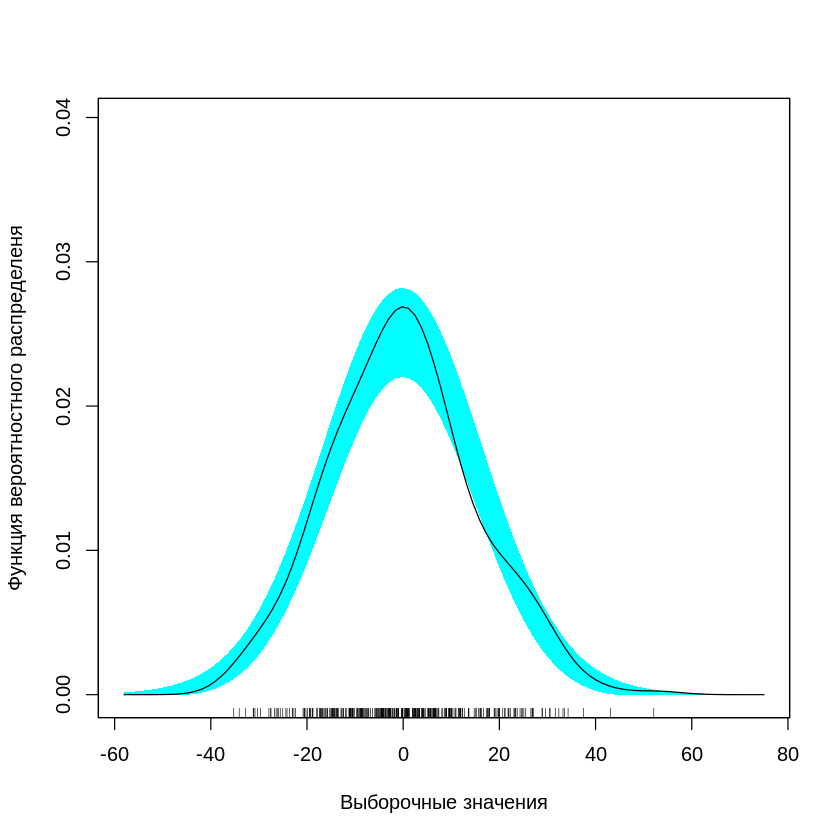

In [55]:
sm.density(sample3$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен в пределах полосы, определяемой нормальным распределением, т.е. график эмпирической плотности схож с графиком плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может подходить для описания исследуемого показателя

## Четвертая выборка

Квантильный график

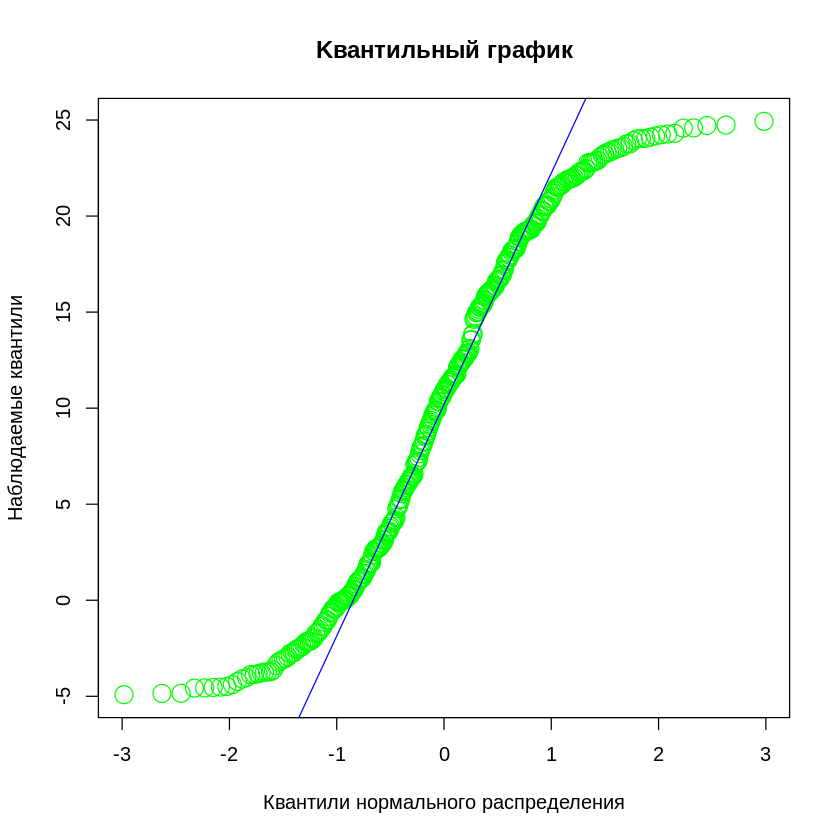

In [17]:
qqnorm(sample4$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample4$s15, col = "blue")

Большинство точек графика распределены не вдоль биссектрисы, т.е. квантили эмпирического распределения сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может не подходить

Диаграмма сравнения плотности нормального распределения выборки

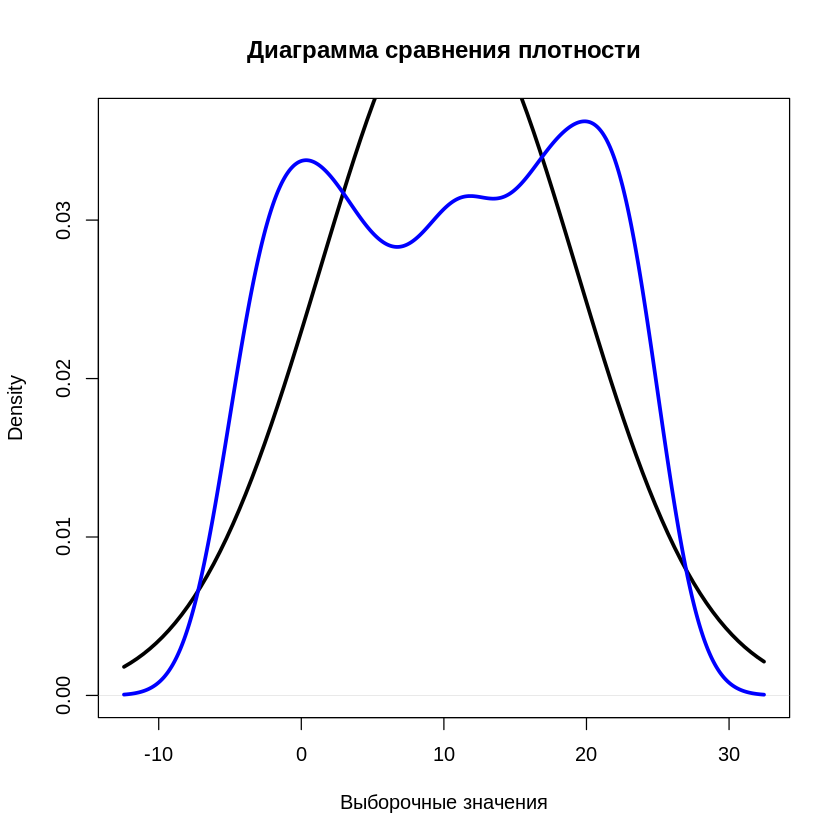

In [52]:
m1 <- mean(sample4$s15)
s1 <- sd(sample4$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample4$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample4$s15),col = "blue", lwd = 3)

График эмпирической плотности, сильно отличается от графика плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может не подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

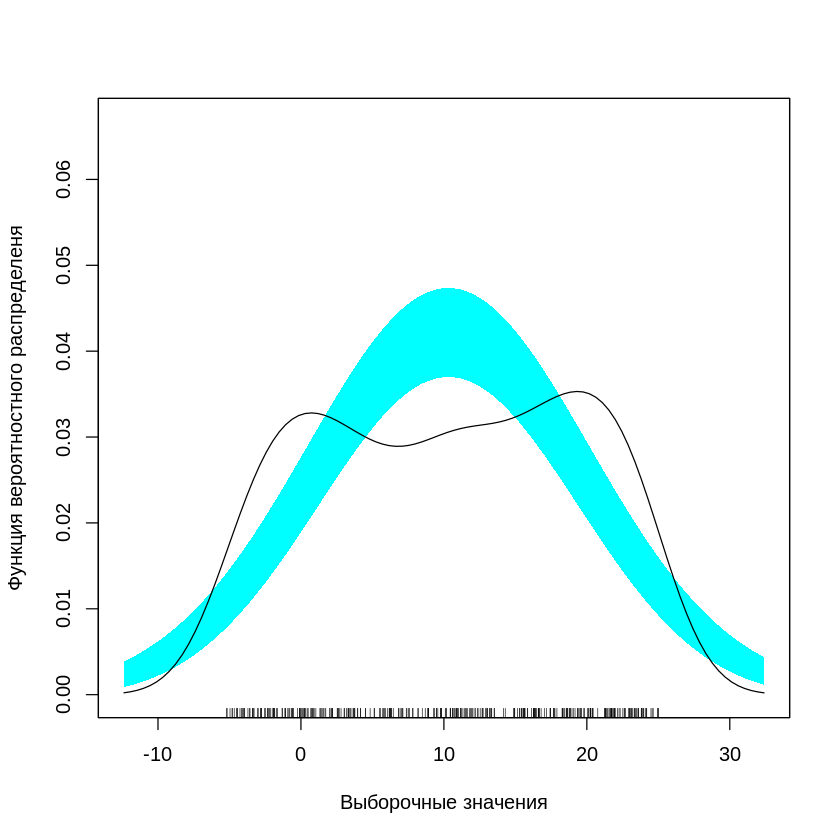

In [56]:
sm.density(sample4$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен за пределами полосы, определяемой нормальным распределением, т.е. график эмпирической плотности отличается от графика плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может не подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может не подходить для описания исследуемого показателя

## Итоги визуализации


На основе анализа диаграмм можем сделать вывод, что для первой, второй и третей генеральной совокупности соответствующее нормальное распределение может подходить для описания исследуемого показателя, а для четвертой может не подходить

#Использование тестов

Проверим с помощью тестов Шапиро-Уилка, Андерса-Дарлинга, Крамера-Майзеса и Колмогорова-Смирнова (с поправками Лилльефорса) гипотезу о нормальности распределения для каждой из четырех генеральных совокупностей

## Первая выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [20]:
shapiro.test(sample1$s15)


	Shapiro-Wilk normality test

data:  sample1$s15
W = 0.99485, p-value = 0.2933


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [21]:
ad.test(sample1$s15)


	Anderson-Darling normality test

data:  sample1$s15
A = 0.44483, p-value = 0.2825


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [22]:
cvm.test(sample1$s15)


	Cramer-von Mises normality test

data:  sample1$s15
W = 0.065183, p-value = 0.3225


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [23]:
lillie.test(sample1$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample1$s15
D = 0.039727, p-value = 0.1971


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

**Вывод:** на основе тестов можно сделать вывод, что для первой выборки гипотеза о нормальности распределения генеральной совокупности не отвергается

## Вторая выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [24]:
shapiro.test(sample2$s15)


	Shapiro-Wilk normality test

data:  sample2$s15
W = 0.99845, p-value = 0.9891


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [25]:
ad.test(sample2$s15)


	Anderson-Darling normality test

data:  sample2$s15
A = 0.17435, p-value = 0.9253


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [26]:
cvm.test(sample2$s15)


	Cramer-von Mises normality test

data:  sample2$s15
W = 0.02959, p-value = 0.8524


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [27]:
lillie.test(sample2$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample2$s15
D = 0.022867, p-value = 0.9276


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

**Вывод:** на основе тестов можно сделать вывод, что для второй выборки гипотеза о нормальности распределения генеральной совокупности не отвергается

## Третья выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [28]:
shapiro.test(sample3$s15)


	Shapiro-Wilk normality test

data:  sample3$s15
W = 0.99346, p-value = 0.1339


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [29]:
ad.test(sample3$s15)


	Anderson-Darling normality test

data:  sample3$s15
A = 0.55328, p-value = 0.1527


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [30]:
cvm.test(sample3$s15)


	Cramer-von Mises normality test

data:  sample3$s15
W = 0.084517, p-value = 0.1805


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [31]:
lillie.test(sample3$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample3$s15
D = 0.037312, p-value = 0.2774


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

**Вывод:** на основе тестов можно сделать вывод, что для третей выборки гипотеза о нормальности распределения генеральной совокупности не отвергается

## Четвертая выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [32]:
shapiro.test(sample4$s15)


	Shapiro-Wilk normality test

data:  sample4$s15
W = 0.94169, p-value = 1.673e-10


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается с возможной 5%-й ошибкой

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [33]:
ad.test(sample4$s15)


	Anderson-Darling normality test

data:  sample4$s15
A = 5.5761, p-value = 9.1e-14


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается  с возможной 5%-й ошибкой

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [34]:
cvm.test(sample4$s15)


	Cramer-von Mises normality test

data:  sample4$s15
W = 0.79661, p-value = 1.464e-08


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается с возможной 5%-й ошибкой

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [35]:
lillie.test(sample4$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample4$s15
D = 0.080902, p-value = 9.44e-06


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается с возможной 5%-й ошибкой

**Вывод:** на основе тестов можно сделать вывод, что для четвертой выборки гипотеза о нормальности распределения генеральной совокупности отвергается

## Итоги исследования

На основе анализа диаграмм сравнения плотности нормального распределения, квантильным графикам нормального распределения и диаграммам сравнения графика эмпирической плотности с графиком плотности нормального распределения и результатов тестов Шапиро-Уилка, Андерса-Дарлинга, Крамера-Майзеса и Колмогорова-Смирнова можем сделать вывод, что для первой, второй и третей выборки гипотеза о нормальности распределения генеральной совокупности не отвергается, а для четвертой отвергается

#Заключение

Цель работы — проверить гипотезу о нормальности распределения исследуемого признака генеральной совокупности. Для этого были использованы пакеты dplyr, readxl, sm и nortest. Разделили объединённую выборку, включающую четыре независимых выборки объема 350 каждая (группирующая переменная Factor служит индикатором, показывающим к какой из четырех выборок относится элемент объединённой выборки). Для каждой из четырех выборок построили следующие диаграммы: квантильный
график нормального распределения, диаграмму сравнения графика эмпирической плотности с графиком плотности нормального распределения, диаграмму расположения графика эмпирической плотности относительно полосы, определяемой нормальным распределением. Проверили с помощью тестов Шапиро-Уилка, Андерса-Дарлинга, Крамера-Майзеса и Колмогорова-Смирнова гипотезу о нормальном распределении при 5%-ом уровне значимости для каждой из четырех генеральных совокупностей, представленных имеющимися независимыми выборками. Подведя итоги исследования сделали вывод, что на основе анализа диаграмм и результатов тестов для первой, второй и третей выборки гипотеза о нормальности распределения соответствующей генеральной совокупности не отвергается, а для четвертой отвергается